In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/Algerian_forest_fires_cleaned.csv")

In [3]:
df.head()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0

In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [6]:
df.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI      Classes  \
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5  not fire      
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4  not fire      
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1  not fire      
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0  not fire      
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5  not fire      

   Region  
0       0  
1       0  
2       0  
3       0  
4       0

In [7]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
df["Classes"]=np.where(df["Classes"].str.contains('not fire'),0,1)

In [9]:
df.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [10]:
df.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0

In [11]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
X.head()

Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0

In [13]:
y[:5]

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [16]:
X_train.corr()

Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.656095 -0.305977 -0.317512  0.694768  0.498173   
RH             -0.656095  1.000000  0.225736  0.241656 -0.653023 -0.414601   
Ws             -0.305977  0.225736  1.000000  0.251932 -0.190076  0.000379   
Rain           -0.317512  0.241656  0.251932  1.000000 -0.545491 -0.289754   
FFMC            0.694768 -0.653023 -0.190076 -0.545491  1.000000  0.620807   
DMC             0.498173 -0.414601  0.000379 -0.289754  0.620807  1.000000   
DC              0.390684 -0.236078  0.096576 -0.302341  0.524101  0.868647   
ISI             0.629848 -0.717804 -0.023558 -0.345707  0.750799  0.685656   
BUI             0.473609 -0.362317  0.035633 -0.300964  0.607210  0.983175   
Classes         0.542141 -0.456876 -0.082570 -0.369357  0.781259  0.617273   
Region          0.254549 -0.394665 -0.199969 -0.059022  0.249514  0.212582   

                   DC       ISI       BUI   Classes    Region  
Temperature  0.390684  0.629848  0.473609  0.542141  0.254549  
RH          -0.236078 -0.717804 -0.362317 -0.456876 -0.394665  
Ws           0.096576 -0.023558  0.035633 -0.082570 -0.199969  
Rain        -0.302341 -0.345707 -0.300964 -0.369357 -0.059022  
FFMC         0.524101  0.750799  0.607210  0.781259  0.249514  
DMC          0.868647  0.685656  0.983175  0.617273  0.212582  
DC           1.000000  0.513701  0.942414  0.543581 -0.060838  
ISI          0.513701  1.000000  0.643818  0.742977  0.296441  
BUI          0.942414  0.643818  1.000000  0.612239  0.114897  
Classes      0.543581  0.742977  0.612239  1.000000  0.188837  
Region      -0.060838  0.296441  0.114897  0.188837  1.000000

<AxesSubplot: >

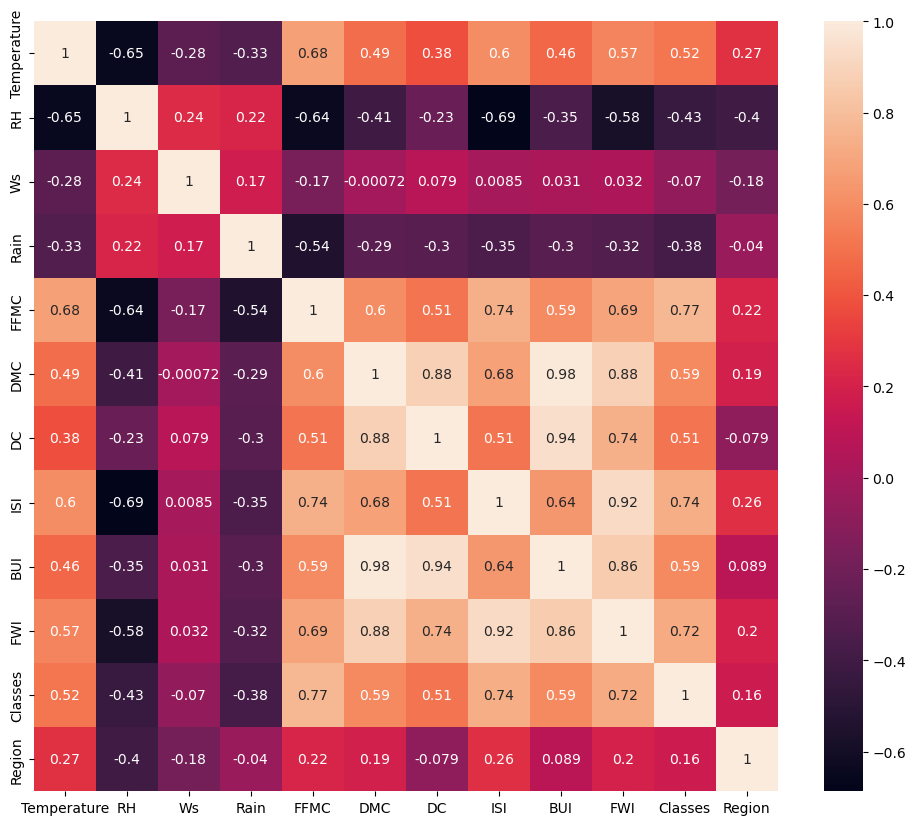

In [17]:
#check for multicollinearity
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [18]:
def collinearity(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = collinearity(X_train,0.85)

In [20]:
corr_features

{'BUI', 'DC'}

In [21]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

# Feature scaling or Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:
X_train_scaled[:1]

array([[-0.84284248,  0.78307967,  1.29972026, -0.33727373, -0.12805583,
        -0.88272888, -0.62963326, -1.10431526, -0.98907071]])

In [26]:
X_test_scaled[:1]

array([[-0.37321518,  0.18652606, -0.07560346, -0.39346542,  0.57551648,
        -0.0271484 ,  0.33321956,  0.80538727, -1.01653005]])

# Box Plots to understand Effect of Standard Scaler

<AxesSubplot: >

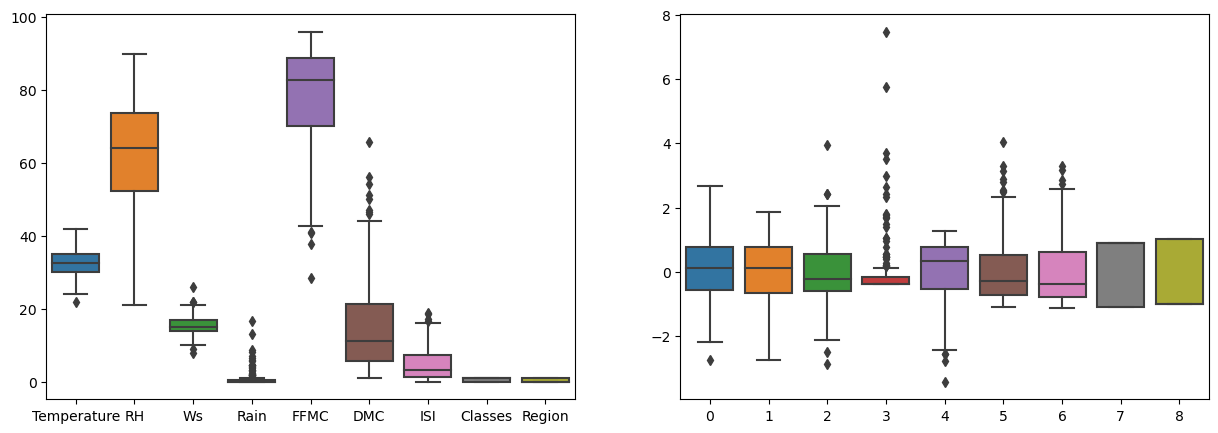

In [27]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

# Linear regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [29]:
linreg=LinearRegression()

In [30]:
linreg.fit(X_train_scaled,y_train)

LinearRegression()

In [31]:
y_pred = linreg.predict(X_test_scaled)

In [32]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(0.9939450225331371,
 1.7391885638204725,
 1.3187829858701061,
 0.9607056657860652)

<AxesSubplot: xlabel='FWI'>

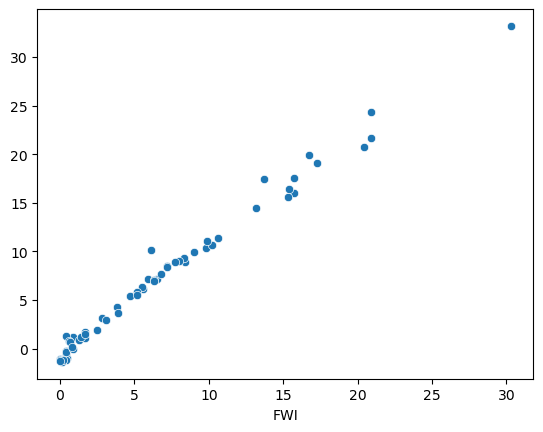

In [33]:
sns.scatterplot(x=y_test,y=y_pred)

# LASSO Regression

In [34]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
lasso_reg = Lasso()

In [36]:
lasso_reg.fit(X_train_scaled,y_train)

Lasso()

In [37]:
y_pred = lasso_reg.predict(X_test_scaled)

In [38]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(0.9605020166901078,
 1.3589274038116677,
 1.1657304164392674,
 0.9692970913627958)

<AxesSubplot: xlabel='FWI'>

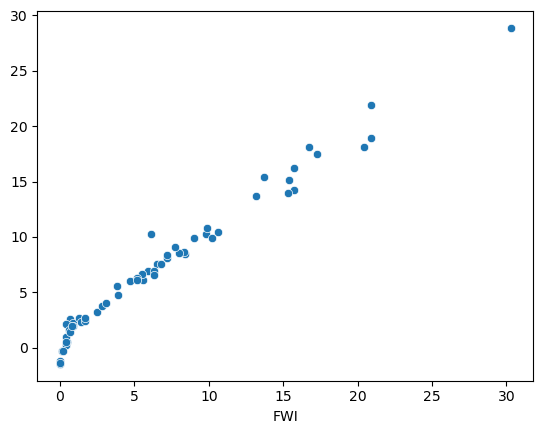

In [39]:
sns.scatterplot(x=y_test,y=y_pred)

# Cross validation LASSO

In [40]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [41]:
lasso_cv = LassoCV(cv=5)

In [42]:
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [43]:
lasso_cv.alpha_

0.05725391318234411

In [44]:
# lasso_cv.alphas_

In [45]:
y_pred = lasso_cv.predict(X_test_scaled)

In [46]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(0.9630024676566873,
 1.7212352069132875,
 1.3119585385648769,
 0.9611112947220234)

<AxesSubplot: xlabel='FWI'>

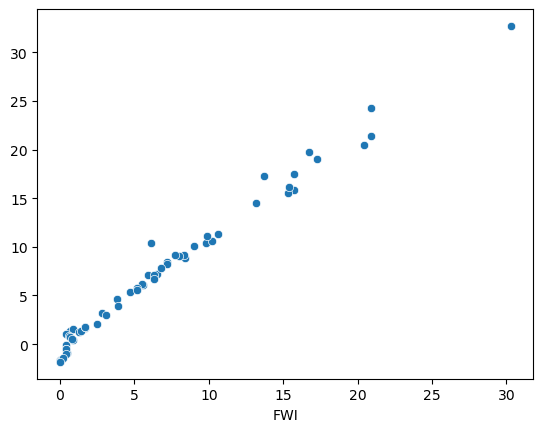

In [47]:
sns.scatterplot(x=y_test,y=y_pred)

# Ridge Regression

In [48]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
ridgereg = Ridge()

In [50]:
ridgereg.fit(X_train_scaled,y_train)

Ridge()

In [51]:
y_pred = ridgereg.predict(X_test_scaled)

In [52]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(0.9862070802884405,
 1.6975754626951072,
 1.3029103816821428,
 0.9616458508455313)

<AxesSubplot: xlabel='FWI'>

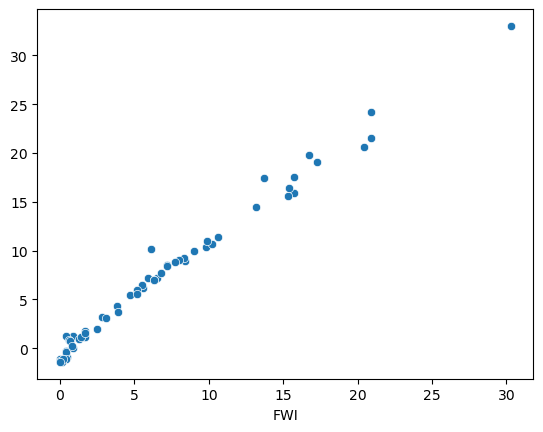

In [53]:
sns.scatterplot(x=y_test,y=y_pred)

In [54]:
# ridge cross validation
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [55]:
ridge_cv = RidgeCV(cv=5)

In [56]:
ridge_cv.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

In [57]:
y_pred = ridge_cv.predict(X_test_scaled)

In [58]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(0.9862070802884405,
 1.6975754626951072,
 1.3029103816821428,
 0.9616458508455313)

In [62]:
ridge_cv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

<AxesSubplot: xlabel='FWI'>

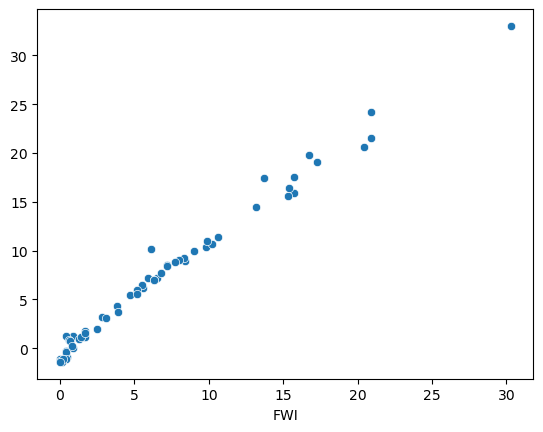

In [59]:
sns.scatterplot(x=y_test,y=y_pred)

In [61]:
# Elasticnet regression

In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
elasticnet_reg = ElasticNet()

In [66]:
elasticnet_reg.fit(X_train_scaled,y_train)

ElasticNet()

In [72]:
y_pred = elasticnet_reg.predict(X_test_scaled)

In [73]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(1.6511868133560943, 4.064436888454823, 2.016044862708869, 0.9081701979826985)

<AxesSubplot: xlabel='FWI'>

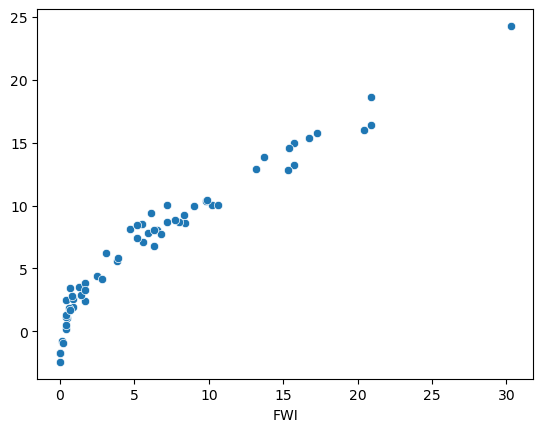

In [74]:
sns.scatterplot(x=y_test,y=y_pred)

In [75]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
elasticnet_cv = ElasticNetCV(cv=5)

In [77]:
elasticnet_cv.fit(X_train_scaled,y_train)

ElasticNetCV(cv=5)

In [78]:
y_pred = elasticnet_cv.predict(X_test_scaled)

In [79]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2s = r2_score(y_test,y_pred)
mae,mse,rmse,r2s

(0.9658446127981584,
 1.6125671690762813,
 1.2698689574425706,
 0.9635664846226284)

<AxesSubplot: xlabel='FWI'>

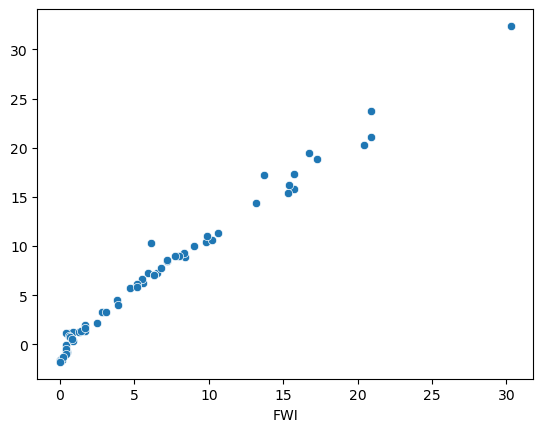

In [80]:
sns.scatterplot(x=y_test,y=y_pred)

In [81]:
## Pickle the ML models, preprocessing and standardscaler

In [83]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridgereg,open('ridge.pkl','wb'))